In [9]:
import os
import pandas as pd
import ast
import numpy as np


In [10]:
folder_path = r'C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\BATTLE FRONTIER'
files = os.listdir(folder_path)

In [11]:
data_frames = []  # 存储每个文件的 DataFrame

for file in files:
    file_path = os.path.join(folder_path, file)
    if file.endswith('.csv'):  # 假设文件是以.csv结尾的
        df = pd.read_csv(file_path, delimiter=';')  # 读取文件为 DataFrame
        data_frames.append(df)  # 将 DataFrame 添加到列表中

# 合并所有 DataFrame
merged_df = pd.concat(data_frames, ignore_index=True)

In [12]:
merged_df

,game_status,enemy_status,state_dict,memory_coords,memory_battle_status,memory_my_sprits_status,timestamp
0,{'return_status': 0},{'enemy_count': 0},{},"{'x_coords': 3, 'y_coords': 52, 'map_number': ...","{'player_info_not_sure_address': 3938207536, '...","{0: {'pokedex': 553, 'hp': 232, 'happiness': 1...",1.686029e+09
1,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': 0},{},"{'x_coords': 3, 'y_coords': 52, 'map_number': ...","{'player_info_not_sure_address': 3938207536, '...","{0: {'pokedex': 553, 'hp': 232, 'happiness': 1...",1.686029e+09
2,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},{},"{'x_coords': 3, 'y_coords': 52, 'map_number': ...","{'player_info_not_sure_address': 3938207536, '...","{0: {'pokedex': 553, 'hp': 232, 'happiness': 1...",1.686029e+09
3,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},{},"{'x_coords': 3, 'y_coords': 52, 'map_number': ...","{'player_info_not_sure_address': 3938207536, '...","{0: {'pokedex': 553, 'hp': 232, 'happiness': 1...",1.686029e+09
4,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},{},"{'x_coords': 3, 'y_coords': 52, 'map_number': ...","{'player_info_not_sure_address': 3938207536, '...","{0: {'pokedex': 553, 'hp': 232, 'happiness': 1...",1.686029e+09
...,...,...,...,...,...,...,...
1786,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'BATTLE FRONTIER Ch. 1\n', 'money'...","{'x_coords': 22, 'y_coords': 47, 'map_number':...","{'player_info_not_sure_address': 3938207536, '...","{0: {'pokedex': 553, 'hp': 232, 'happiness': 1...",1.686030e+09
1787,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'BATTLE FRONTIER Ch. 1.\n', 'money...","{'x_coords': 23, 'y_coords': 47, 'map_number':...","{'player_info_not_sure_address': 3938207536, '...","{0: {'pokedex': 553, 'hp': 232, 'happiness': 1...",1.686030e+09
1788,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'BATTLE FRONTIER Ch. 1.\n', 'money...","{'x_coords': 23, 'y_coords': 47, 'map_number':...","{'player_info_not_sure_address': 3938207536, '...","{0: {'pokedex': 553, 'hp': 232, 'happiness': 1...",1.686030e+09
1789,"{'return_status': 1, 'check_battle_end_pokemon...",{'enemy_count': None},"{'address': 'BATTLE FRONTIER Ch. 1.\n', 'money...","{'x_coords': 23, 'y_coords': 47, 'map_number':...","{'player_info_not_sure_address': 3938207536, '...","{0: {'pokedex': 553, 'hp': 232, 'happiness': 1...",1.686030e+09


In [13]:
df=merged_df.copy()

In [14]:
# 将字符串转换为字典格式
df['memory_coords'] = df['memory_coords'].apply(ast.literal_eval)
df['game_status'] = df['game_status'].apply(ast.literal_eval)

# 提取 "x_coords"、"y_coords" 和 "map_number" 到新列
df['x_coords'] = df['memory_coords'].apply(lambda x: x.get('x_coords'))
df['y_coords'] = df['memory_coords'].apply(lambda x: x.get('y_coords'))
df['map_number'] = df['memory_coords'].apply(lambda x: x.get('map_number'))
df['face_dir']=df['memory_coords'].apply(lambda x: x.get('face_dir'))
df['transport']=df['memory_coords'].apply(lambda x: x.get('transport'))



In [15]:
f = df.drop(['memory_coords'], axis=1)
df = df.drop(['game_status', 'enemy_status', 'state_dict', 'memory_battle_status',"memory_my_sprits_status",'face_dir','transport'], axis=1)


In [16]:
df = df.drop(['timestamp', 'memory_coords'], axis=1)

In [17]:
# 拆分 "map_number" 列
df[['map_num_1', 'map_num_2', 'map_num_3']] = pd.DataFrame(df['map_number'].tolist())

# 删除原始的 "map_number" 列
df = df.drop(['map_number'], axis=1)


In [18]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df

,x_coords,y_coords,map_num_1,map_num_2,map_num_3
0,3,52,1,14,76
1,2,52,1,14,76
2,1,52,1,14,76
3,0,52,1,14,76
4,3,53,1,14,76
...,...,...,...,...,...
343,20,47,1,14,76
344,21,47,1,14,76
345,22,47,1,14,76
346,23,47,1,14,76


In [19]:
# 计算数值列的统计信息
numeric_cols = ['x_coords', 'y_coords', 'map_num_1', 'map_num_2', 'map_num_3']
statistics = df[numeric_cols].describe()
print(statistics)


         x_coords    y_coords  map_num_1  map_num_2  map_num_3
count  348.000000  348.000000      348.0      348.0      348.0
mean    21.419540   50.772989        1.0       14.0       76.0
std     11.521531    5.894135        0.0        0.0        0.0
min      0.000000   40.000000        1.0       14.0       76.0
25%     13.000000   46.000000        1.0       14.0       76.0
50%     20.000000   52.000000        1.0       14.0       76.0
75%     29.000000   56.000000        1.0       14.0       76.0
max     51.000000   60.000000        1.0       14.0       76.0


In [20]:
# 计算数值列之间的相关系数
correlation = df[numeric_cols].corr()
print(correlation)


           x_coords  y_coords  map_num_1  map_num_2  map_num_3
x_coords   1.000000  0.328126        NaN        NaN        NaN
y_coords   0.328126  1.000000        NaN        NaN        NaN
map_num_1       NaN       NaN        NaN        NaN        NaN
map_num_2       NaN       NaN        NaN        NaN        NaN
map_num_3       NaN       NaN        NaN        NaN        NaN


In [25]:
# df['new_x'] = df.apply(lambda row: row['x_coords'] + 20 if row['map_num_2'] == 28 else (row['x_coords'] - 40 if row['map_num_2'] == 29 else row['x_coords']), axis=1)
df['new_x']=df['x_coords']
df['new_y'] = df['y_coords']
desired_values = (1,14, 76)  # 指定要筛选的值

filtered_df = df[(df['map_num_1'] == desired_values[0]) & (df['map_num_2'] == desired_values[1])& (df['map_num_3'] == desired_values[2])]

selected_columns = ['map_num_1', 'map_num_2', 'map_num_3']
filtered_df = filtered_df[selected_columns]
df

,x_coords,y_coords,map_num_1,map_num_2,map_num_3,new_x,new_y
0,3,52,1,14,76,3,52
1,2,52,1,14,76,2,52
2,1,52,1,14,76,1,52
3,0,52,1,14,76,0,52
4,3,53,1,14,76,3,53
...,...,...,...,...,...,...,...
343,20,47,1,14,76,20,47
344,21,47,1,14,76,21,47
345,22,47,1,14,76,22,47
346,23,47,1,14,76,23,47


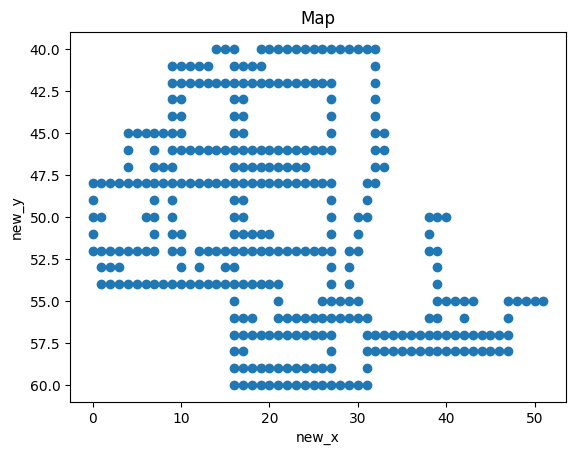

In [26]:
import matplotlib.pyplot as plt

# 创建图形对象和坐标轴
fig, ax = plt.subplots()

# 绘制散点图
ax.scatter(df['new_x'], df['new_y'])

# 反转 y 轴
ax.invert_yaxis()

# 设置坐标轴标签
ax.set_xlabel('new_x')
ax.set_ylabel('new_y')

# 设置标题
ax.set_title('Map')

# 显示图形
plt.show()


In [27]:
# 将坐标点四舍五入到最近的整数
df = df.round(0)
# 创建一个空的DataFrame，它的行和列分别代表y和x的值
grid_df = pd.DataFrame(index=np.arange(int(df['new_y'].min()), int(df['new_y'].max()) + 1),
                       columns=np.arange(int(df['new_x'].min()), int(df['new_x'].max()) + 1))

# 将存在的坐标点填充为1
for _, row in df.iterrows():
    grid_df.at[int(row['new_y']), int(row['new_x'])] = 1

# # 反转y轴
#grid_df = grid_df.iloc[::-1]

# 导出到Excel
grid_df.to_excel("BATTLE FRONTIER coordinates.xlsx")

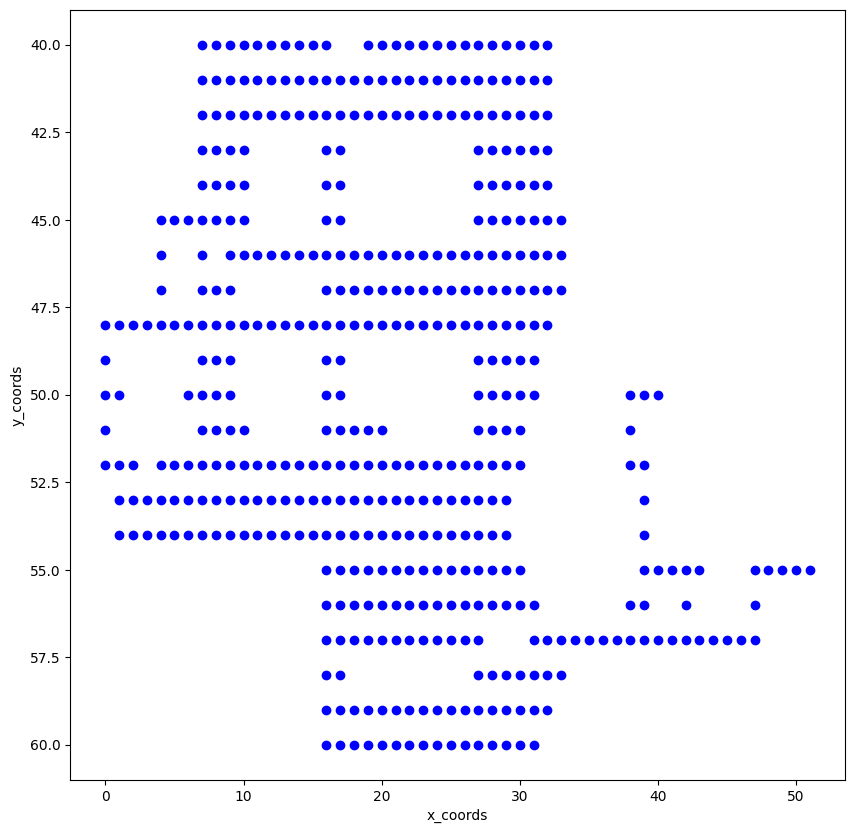

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取Excel文件
df = pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\BATTLE FRONTIER coordinates.xlsx", index_col=0)

# 反转y轴
#df = df.iloc[::-1]

# 获取非空单元格的坐标
coords = np.argwhere(df.values == 1)
x_coords = df.columns[coords[:, 1]].values
y_coords = df.index[coords[:, 0]].values

# 创建一个新的图形
plt.figure(figsize=(10, 10))

# 画出散点图
plt.scatter(x_coords, y_coords, color='b')
# y轴反转
plt.gca().invert_yaxis()
# 设定坐标轴的标题
plt.xlabel('x_coords')
plt.ylabel('y_coords')

# 显示图形
plt.show()


In [35]:
#df = pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\FALLARBOR TOWN coordinates.xlsx", index_col=0)
#df = pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\SOOTOPOLIS_CITY coordinates.xlsx", index_col=0)
df=pd.read_excel(r"C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\BATTLE FRONTIER coordinates.xlsx", index_col=0)
# 先重置索引，这样行标签就变成一列
df = df.reset_index()
df




,index,0,1,2,3,4,5,6,7,8,...,42,43,44,45,46,47,48,49,50,51
0,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,45,NaN,NaN,NaN,NaN,4.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,46,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,47,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,48,4.0,4.0,4.0,4,4.0,4.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,49,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
# 使用 melt，这会把所有列都转成两列，一列是原来的列名（变量），一列是对应的值
df_melted = df.melt(id_vars='index', var_name='x_coords', value_name='mark')
df_melted


,index,x_coords,mark
0,40,0,NaN
1,41,0,NaN
2,42,0,NaN
3,43,0,NaN
4,44,0,NaN
...,...,...,...
1087,56,51,NaN
1088,57,51,NaN
1089,58,51,NaN
1090,59,51,NaN


In [37]:
# 修改列名
df_melted.rename(columns={'index': 'y_coords'}, inplace=True)
df_melted


,y_coords,x_coords,mark
0,40,0,NaN
1,41,0,NaN
2,42,0,NaN
3,43,0,NaN
4,44,0,NaN
...,...,...,...
1087,56,51,NaN
1088,57,51,NaN
1089,58,51,NaN
1090,59,51,NaN


In [38]:
# 过滤掉 mark 列为 NaN 的行
df_melted = df_melted.dropna(subset=['mark'])
df_melted

,y_coords,x_coords,mark
8,48,0,4.0
9,49,0,4.0
10,50,0,4.0
11,51,0,4.0
12,52,0,4.0
...,...,...,...
1006,59,47,2.0
1023,55,48,4.0
1044,55,49,4.0
1065,55,50,4.0


In [39]:
# 把值为PC_IN的单元格的值改成112
df_melted.loc[df_melted['mark'] == 'pc_in', 'mark'] = 112

df_melted.loc[df_melted['mark'] == 'farming', 'mark'] = 66
# 所有float类型的值转成int
df_melted = df_melted.astype({'mark': 'int'})

df_melted.reset_index(drop=True, inplace=True)

# 输出查看结果
print(df_melted)

     y_coords x_coords  mark
0          48        0     4
1          49        0     4
2          50        0     4
3          51        0     4
4          52        0     4
..        ...      ...   ...
476        59       47     2
477        55       48     4
478        55       49     4
479        55       50     4
480        55       51     4

[481 rows x 3 columns]


In [40]:
df_melted.to_csv(r'C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\BATTLE_FRONTIER_coords_tracking.csv')


In [1]:
import matplotlib.pyplot as plt
df_melted=pd.read_csv(r'C:\Users\SS\Documents\GitHub\pokemmo_py_auto\asserts\coords_tracking\SOOTOPOLIS_CITY_coords_tracking.csv',index_col=0)
# 创建颜色映射
color_map = {1: 'lightblue', 2: 'blue', 3: 'khaki', 4: 'green', 112: 'red'}

# 将 mark 列转换为颜色
df_melted['color'] = df_melted['mark'].map(color_map)

# 绘制散点图
plt.figure(figsize=(10, 8))
plt.scatter(df_melted['x_coords'], df_melted['y_coords'], c=df_melted['color'], alpha=0.5)

# 反转 y 轴
plt.gca().invert_yaxis()

# 设置图标题和轴标签
plt.title('Scatter plot with color-coded marks')
plt.xlabel('x_coords')
plt.ylabel('y_coords')

# 显示图形
plt.show()


NameError: name 'pd' is not defined